In [1]:
import numpy as np
from matplotlib import image
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

In [2]:
!wget -q 'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png'

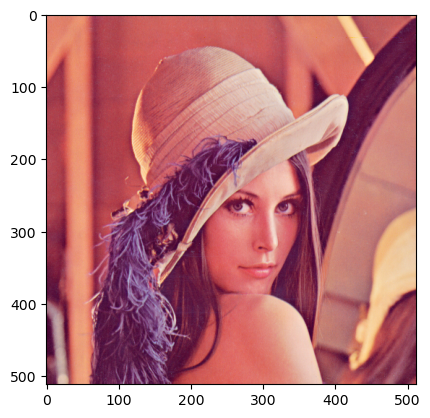

In [3]:
image = image.imread('Lenna_(test_image).png')
plt.imshow(image);

In [4]:
def convolve(image, kernel):
  output = np.zeros(image.shape)
  for i in range(3):
    output[:, :, i] = convolve2d(image[:, :, i], kernel, mode='same', boundary='wrap')
  return output

# Types of kernels from https://en.wikipedia.org/wiki/Kernel_(image_processing)
identity_kernel = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
edge_kernel = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
sharpen_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
blur_kernel = 1/9 * np.ones((3, 3))
shift_kernel = np.array([[0, 1, 0], [0, 0, 0], [0, 0, 0]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


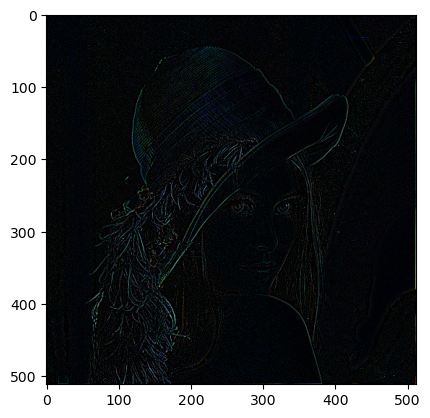

In [5]:
# Edge detection
plt.imshow(convolve(image, edge_kernel))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


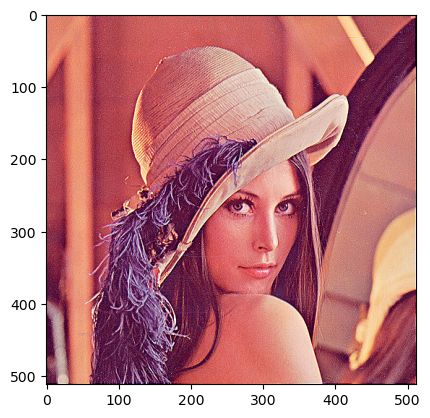

In [6]:
edges = convolve(image, edge_kernel)
highlights = image + edges
plt.imshow(highlights)
plt.show()

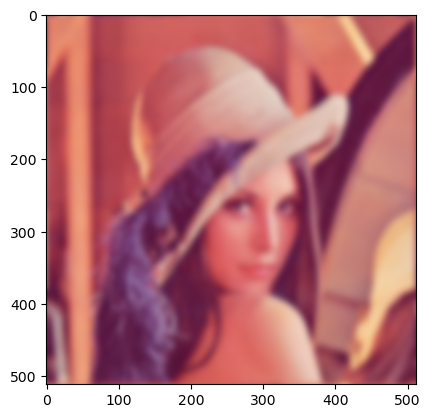

In [7]:
# Blurring the image
blurred = image
for _ in range(32):
  blurred = convolve(blurred, blur_kernel)

plt.imshow(blurred);

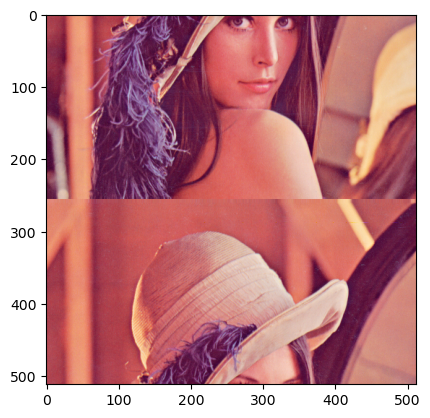

In [8]:
# Shifting the image
shifted = image
for _ in range(256):
  shifted = convolve(shifted, shift_kernel)

plt.imshow(shifted);